# The Galápagos Project

Many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galápagos archipelago, particularly in the study of the small birds, called finches, that inhabit them. The islands are ideal for studying evolution because they are isolated so they do not have complicated effects from interactions with other species including humans. Furthermore, some of them are small, so entire populations can be monitored on a given island. Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny volcanic cinder cone island of Daphne Major in the Galápagos. This island has two dominant ground finch species, Geospiza fortis and Geospiza scandens. The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing, and more. In 2014, they published a book entitled <em>40 Years of Evolution: Darwin's Finches on Daphne Major Island</em>. They generously placed all of their data on the Dryad data repository making it free for anyone to use. The data set is impressive and a great set for using data science and statistical inference to learn about evolution. We will work with the Grants' measurements of beak depth. We'll consider different aspects of the beak geometry, including how it varies over time, from species to species, and from parents to offspring.

## Setup

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading 1975 data

df_fb_1975 = pd.read_csv('data/Galapagos/finch_beaks_1975.csv')
df_fb_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [3]:
# preprocessing 1975 dataset

df1 = df_fb_1975[df_fb_1975['species']=='scandens'].drop(['band', 'species', 'Beak length, mm'], axis=1)
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak depth'}, inplace=True)
df1.head()

,beak depth,year
316,8.4,1975
317,8.8,1975
318,8.4,1975
319,8.0,1975
320,7.9,1975


In [4]:
# loading 2012 data

df_fb_2012 = pd.read_csv('data/Galapagos/finch_beaks_2012.csv')
df_fb_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [5]:
# preprocessing 2012 dataset

df2 = df_fb_2012[df_fb_2012['species']=='scandens'].drop(['band', 'species', 'blength'], axis=1)
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak depth'}, inplace=True)
df2.head()

,beak depth,year
121,9.4,2012
122,8.9,2012
123,9.5,2012
124,11.0,2012
125,8.7,2012


In [6]:
# joining the 2 datasets in one

dfd = pd.concat([df1, df2], axis=0)
dfd = dfd.reset_index()
dfd = dfd.drop('index', axis=1)
dfd.head()

,beak depth,year
0,8.4,1975
1,8.8,1975
2,8.4,1975
3,8.0,1975
4,7.9,1975


In [7]:
dfd.shape

(214, 2)

### EDA of beak depths of Darwin's finches

Let's study study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species <em>Geospiza Scandens</em> has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

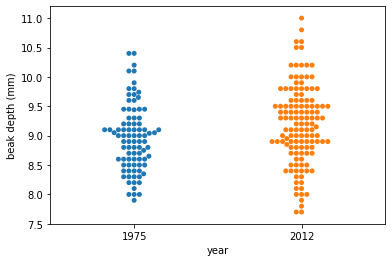

In [8]:
# Create bee swarm plot
_ = sns.swarmplot(y='beak depth', x='year', data=dfd)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show();

### ECDFs of beak depths

Bee swarm plots are useful, but ECDFs (Empirical Cumulative Distribution Function) are often even better when doing EDA. Let's plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

In [9]:
# function to compute ecdf

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
# creating two arrays with data separated by year

bd_1975 = np.array(dfd[dfd['year']==1975].drop('year', axis=1))
bd_1975 = np.reshape(bd_1975, bd_1975.shape[0])

bd_2012 = np.array(dfd[dfd['year']==2012].drop('year', axis=1))
bd_2012 = np.reshape(bd_2012, bd_2012.shape[0])

In [11]:
# computing ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

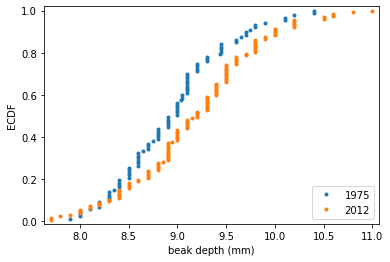

In [12]:
# plotting ECDFs

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show();

### Parameter estimates of beak depths

Let's estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [13]:
# functions to generate bootstrap replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [14]:
# computing the difference of the sample means

mean_diff = np.mean(bd_2012) - np.mean(bd_1975)
print('difference of means =', mean_diff, 'mm')

difference of means = 0.22622047244094645 mm


In [15]:
# computing 95% confidence interval

bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'mm')

95% confidence interval = [0.06021681 0.39441499] mm


We got a difference of 0.2 mm between the means. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### Hypothesis test: are beaks deeper in 2012?

The confidence interval we just saw makes it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

The hypothesis we are analysing is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [16]:
# shifting the samples

combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))
bd_1975_shifted = bd_1975 + combined_mean - np.mean(bd_1975)
bd_2012_shifted = bd_2012 + combined_mean - np.mean(bd_2012)

In [17]:
# getting bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

In [18]:
# computing replicates of difference of means

bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

In [19]:
# computing the p-value

p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
print('p =', p)

p = 0.0037


The p-value is 0.0035, which suggests that there is a statistically significant difference.

We just determined that the beak depth of <em>Geospiza Scandens</em> changed over the course of 37 years. There are a few hypotheses as to why this is the case. One reason may be a drought in 1976 and 1977 that resulted in the death of the plants that produce small seeds on the island. The larger seeds required deeper beaks to crack them, so large-beaked birds survived and then reproduced. If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and depth change at the same rate, the beak has the same shape; it just gets bigger. But if the beak length and beak depth change differently, the shape of the beak changes. Now it's time to investigate how beak length and depth change together.
    
### EDA of beak length and depth

Let's go back to the original datasets and take beak length this time. We still have the beak depth data stored in bd_1975 and bd_2012. We'll produce scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

In [20]:
# producing arrays with beak length by year

# preprocessing 1975 dataset
df3 = df_fb_1975[df_fb_1975['species']=='scandens'].drop(['band', 'species', 'Beak depth, mm'], axis=1)
df3['year'] = 1975
df3.rename(columns={'Beak length, mm': 'beak length'}, inplace=True)

# preprocessing 2012 dataset
df4 = df_fb_2012[df_fb_2012['species']=='scandens'].drop(['band', 'species', 'bdepth'], axis=1)
df4['year'] = 2012
df4.rename(columns={'blength': 'beak length'}, inplace=True)

# joining the 2 datasets in one
dfl = pd.concat([df3, df4], axis=0)
dfl = dfl.reset_index()
dfl = dfl.drop('index', axis=1)

# creating two arrays with data separated by year
bl_1975 = np.array(dfl[dfl['year']==1975].drop('year', axis=1))
bl_1975 = np.reshape(bl_1975, bl_1975.shape[0])
bl_2012 = np.array(dfl[dfl['year']==2012].drop('year', axis=1))
bl_2012 = np.reshape(bl_2012, bl_2012.shape[0])

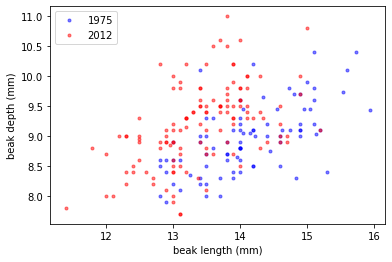

In [21]:
# making scatter plot of 1975 and 2012 data

_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
plt.show();

Beaks got deeper (the red points are higher up in the y-direction), but not longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Linear regressions

Let's perform a linear regression for both the 1975 and 2012 data. Then, we'll perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [22]:
# computing linear regressions

slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

In [23]:
# function to do pairs bootstrap

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [24]:
# performing pairs bootstrap for the linear regressions

bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

In [25]:
# computing and printing confidence intervals of slopes

slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.3374483  0.59656664]
1975: intercept = 2.3908752365842267 conf int = [0.57834244 4.16238511]
2012: slope = 0.462630358835313 conf int = [0.32752046 0.60877554]
2012: intercept = 2.9772474982360198 conf int = [1.07970753 4.77935497]


It looks like they have the same slope, but different intercepts.

### Linear regression results

To display our linear regression results on the scatter plot, let's take the first 100 bootstrap samples (stored in bs_slope_reps_1975, bs_intercept_reps_1975, bs_slope_reps_2012, and bs_intercept_reps_2012) and plot the lines.

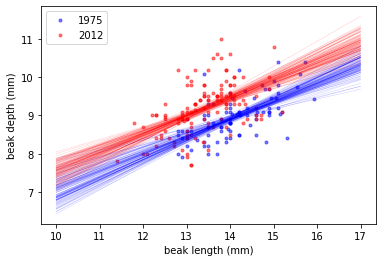

In [26]:
# making scatter plot of 1975 and 2012 data

_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# generating x-values for bootstrap lines
x = np.array([10, 17])

# plotting the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')
plt.show();

### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [27]:
# computing length-to-depth ratios and means

ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

In [28]:
# generating bootstrap replicates of the means

bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

In [29]:
# computing and printing the 99% confidence intervals

conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975, 'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012, 'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55666924 1.60134265]
2012: mean ratio = 1.4658342276847767 conf int = [1.4444784  1.48807641]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

What is causing the beaks of Geospiza scandens to get bigger over time? I mentioned the selective pressure brought on by the drought. But why do some birds have such large beaks to begin with? A prevailing explanation is that scandens birds are mating the other major finch species on Daphne Major, Geopsiza fortis. These hybrid birds then mate with pure scandens, in a process called introgressive hybridization, which can bring fortis characteristics into the scandens species. This is similar to what likely happened to humans when they encountered neanderthals. In order assess the viability of this explanation, we need to know how strongly parental traits are passed on to offspring. In this next paragraphs, we will investigate the extent to which parental beak depth is inherited by offspring in both scandens and fortis.

### EDA of heritability

The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

After creating them, we'll make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species.

In [30]:
df_her_fort = pd.read_csv('data/Galapagos/fortis_beak_depth_heredity.csv')
df_her_fort.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [31]:
bd_parent_fortis = np.array([np.mean(df_her_fort.iloc[r, 1:]) for r in range(len(df_her_fort))])
bd_offspring_fortis = np.array(df_her_fort.iloc[:, 0])

In [32]:
df_her_scan = pd.read_csv('data/Galapagos/scandens_beak_depth_heredity.csv')
df_her_scan.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


In [33]:
bd_parent_scandens = np.array(df_her_scan.iloc[:, 0])
bd_offspring_scandens = np.array(df_her_scan.iloc[:, 1])

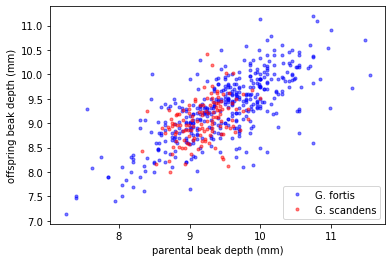

In [34]:
# making scatter plots

_ = plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
plt.show();

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. 

### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

In [35]:
# performs pairs bootstrap and computes a single statistic on pairs samples defined

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""
    inds = np.arange(len(x))
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

### Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [36]:
# computing the Pearson correlation coefficients

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)

    return corr_mat[0,1]

r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

In [37]:
# acquiring 1000 bootstrap replicates of Pearson r

bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

In [38]:
# computing and printing 95% confidence intervals

conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.26454837 0.53941548]
G. fortis: 0.7283412395518487 [0.66962083 0.78068115]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

### Measuring heritability

The Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this paragraph, we will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

In [39]:
# computing heritability

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

In [40]:
# acquiring 1000 bootstrap replicates of heritability

replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)     
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

In [41]:
# computing and printing 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.34792723 0.75573842]
G. fortis: 0.7229051911438156 [0.64933436 0.79599893]


We see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

### Is beak depth heritable at all in G. scandens?

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. We'll test that hypothesis here. To do this, we will do a pairs permutation test.

In [42]:
# drawing replicates

perm_replicates = np.empty(10000)
for i in range(10000):
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

In [43]:
# computing and printing p-value

p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


We got a p-value of zero, which means that none of the 10,000 permutation pairs replicates we drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis.

This ends our project.